# The Spark Foundation

## Data Science and Business Analytics Internship


### Task #6 : Prediction Using Decision Tree Algorithm 

#### Author : Supriya Nagpal

#### Problem: Create the Decision Tree classifier and visualize graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

#### Dataset : https://bit.ly/3kXTdox

### 1. Import Required Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

### 2. Reading Data

In [2]:
#Location of Data required

path = r"Iris.csv"
iris_data = pd.read_csv(path)

In [3]:
iris_data.info() #Information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris_data.head() #Shows only first 5 rows of the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data.tail() ##Shows only last 5 rows of the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris_data #Shows the full data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
iris_data.shape #Gives number of rows and columns

(150, 6)

### 3. Cleaning Data

In [8]:
iris_data.drop('Id', axis = 1, inplace = True) #Drops the specific column
iris_data.columns #Tells the name of remaining columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
iris_data.isnull().sum() #To check null value

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
iris_data.duplicated().sum() #To check duplicate value

3

In [11]:
iris_data.drop_duplicates(inplace = True) #Drops the rows with similar entries
iris_data.shape #Gives number of rows and columns

(147, 5)

In [12]:
iris_data #Shows the full data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
iris_data.describe() #Inform about important statistical terms depending on Data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
iris_data.corr() #Correlation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


### 4. Encoding Data

In [15]:
iris_data #Before Encoding

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
LE = LabelEncoder() #Abbreviation for encoding

In [17]:
#Applying Codes to the Species for easily classifing in further evaluation

iris_data.iloc[:,-1] = LE.fit_transform(iris_data.iloc[:,-1])

In [18]:
iris_data #After Encoding

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 5. Train and Test Algorithm

In [19]:
#Split data in dependent and independent variable

x = iris_data.iloc[:,:-1]
x.head() #Show first 5 rows of data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
x #Show full data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
y = iris_data.iloc[:,-1]
y.head() #Show first 5 rows of data

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [22]:
y #Show full data

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 147, dtype: int32

In [23]:
#Train and Test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 100)

In [24]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
25,5.0,3.0,1.6,0.2
21,5.1,3.7,1.5,0.4
9,4.9,3.1,1.5,0.1
23,5.1,3.3,1.7,0.5
36,5.5,3.5,1.3,0.2
...,...,...,...,...
89,5.5,2.5,4.0,1.3
105,7.6,3.0,6.6,2.1
69,5.6,2.5,3.9,1.1
24,4.8,3.4,1.9,0.2


In [25]:
x_train.shape #Gives number of rows and columns

(110, 4)

In [26]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,5.8,2.8,5.1,2.4
15,5.7,4.4,1.5,0.4
112,6.8,3.0,5.5,2.1
120,6.9,3.2,5.7,2.3
11,4.8,3.4,1.6,0.2
138,6.0,3.0,4.8,1.8
127,6.1,3.0,4.9,1.8
124,6.7,3.3,5.7,2.1
48,5.3,3.7,1.5,0.2
134,6.1,2.6,5.6,1.4


In [27]:
x_test.shape #Gives number of rows and columns

(37, 4)

In [28]:
y_train

25     0
21     0
9      0
23     0
36     0
      ..
89     1
105    2
69     1
24     0
8      0
Name: Species, Length: 110, dtype: int32

In [29]:
y_train.shape #Gives number of rows and columns

(110,)

In [30]:
y_test

114    2
15     0
112    2
120    2
11     0
138    2
127    2
124    2
48     0
134    2
111    2
78     1
28     0
118    2
32     0
131    2
149    2
71     1
103    2
56     1
26     0
92     1
146    2
53     1
16     0
116    2
29     0
39     0
64     1
87     1
107    2
42     0
135    2
106    2
43     0
132    2
6      0
Name: Species, dtype: int32

In [31]:
y_test.shape #Gives number of rows and columns

(37,)

### 6. Model

In [32]:
LE = LabelEncoder() #Abbreviation for encoding

In [33]:
iris_data.iloc[:,-1] = LE.fit_transform(iris_data.iloc[:,-1]) #Fit transforming model

In [34]:
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [35]:
DT = DecisionTreeClassifier() #Abbreviation for model of decision tree

In [36]:
DT.fit(x_train, y_train) #Fitting model of decision tree

DecisionTreeClassifier()

In [37]:
# Predicting data

pre = DT.predict(x_test)
pre

array([2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1,
       2, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0, 2, 0])

In [38]:
y_test = np.array(y_test)
y_test

array([2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1,
       2, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 0])

In [39]:
#Accuracy in data

accuracy_score(pre, y_test)

0.972972972972973

In [40]:
#Confusion matrix

confusion_matrix(pre, y_test)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 17]], dtype=int64)

The confusion matrix gives the way classification model is confused while predicting

### 7. Classification and Model Visualization

In [41]:
#Classifyinh relation among features of Species

print(classification_report(pre, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.94      1.00      0.97        17

    accuracy                           0.97        37
   macro avg       0.98      0.96      0.97        37
weighted avg       0.97      0.97      0.97        37



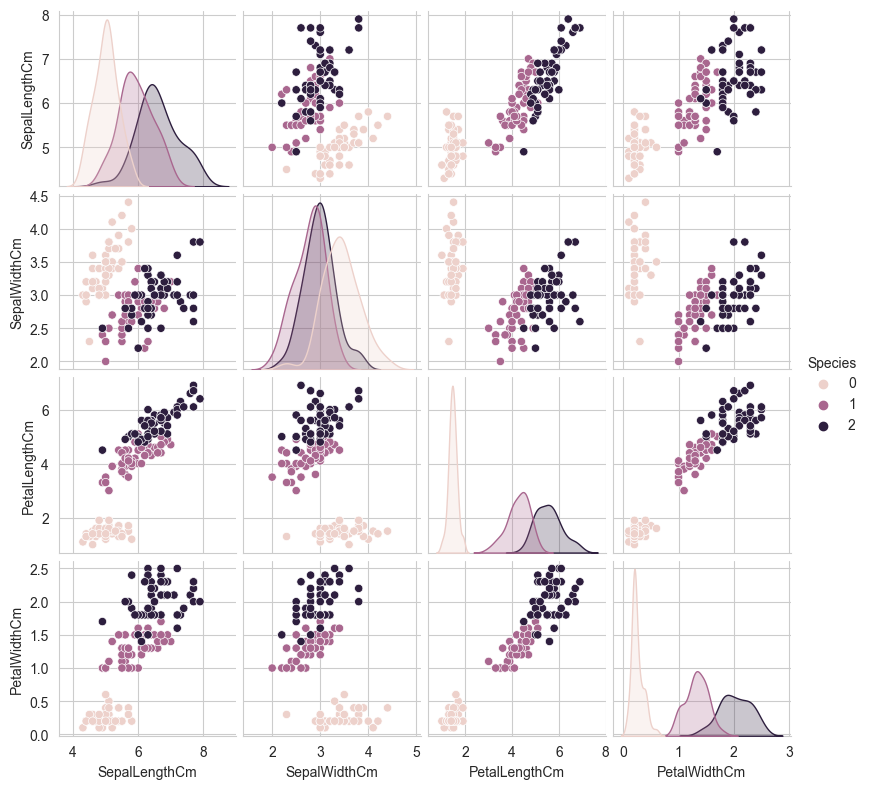

In [42]:
#Visualizing relation among features of Species

sns.set_style("whitegrid");
sns.pairplot(iris_data, hue = "Species", height = 2);
plt.show()

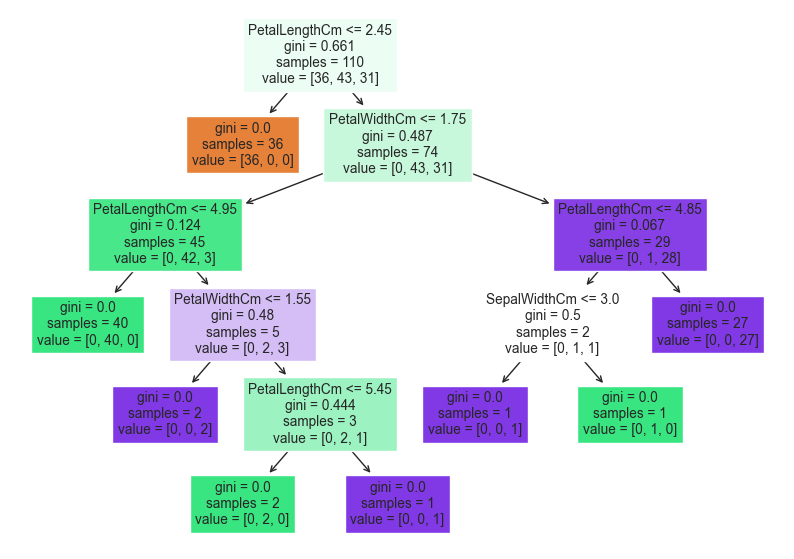

In [43]:
plt.figure(figsize = (10, 7))
Dviz = tree.plot_tree(DT, feature_names = x.columns, filled = True)